### Making a combined dataset

In [7]:
import pandas as pd
import numpy as np

# Load all necessary CSV files
weather_65_years = pd.read_csv(r"C:\Users\tmollick\Documents\Temperature_patterns_Bangladesh\Datasets\65 years.csv")
temperature = pd.read_csv(r"C:\Users\tmollick\Documents\Temperature_patterns_Bangladesh\Datasets\temperature.csv")
rainfall_since_1970 = pd.read_csv(r"C:\Users\tmollick\Documents\Temperature_patterns_Bangladesh\Datasets\rainfall_since_1970.csv")
rainfall = pd.read_csv(r"C:\Users\tmollick\Documents\Temperature_patterns_Bangladesh\Datasets\rainfall.csv")
humidity = pd.read_csv(r"C:\Users\tmollick\Documents\Temperature_patterns_Bangladesh\Datasets\humidity.csv")
stations = pd.read_csv(r"C:\Users\tmollick\Documents\Temperature_patterns_Bangladesh\Datasets\stations.csv")
ndvi = pd.read_csv(r"C:\Users\tmollick\Documents\Temperature_patterns_Bangladesh\Datasets\ndvi.csv")

# Define the stations and the range of years and months
stations_list = [
    "Chittagong (City-Ambagan)", "Barisal", "Bhola", "Bogra", "Chandpur", "Chittagong (IAP-Patenga)",
    "Chuadanga", "Cox's Bazar", "Comilla", "Dhaka", "Dinajpur", "Faridpur", "Feni", "Hatiya", "Ishurdi",
    "Jessore", "Khepupara", "Khulna", "Kutubdia", "Madaripur", "Maijdee Court", "Mongla", "Mymensingh",
    "Patuakhali", "Rajshahi", "Rangamati", "Rangpur", "Sandwip", "Satkhira", "Sayedpur", "Sitakunda",
    "Srimangal", "Sylhet", "Tangail", "Teknaf"
]
years = list(range(1949, 2018))
months = list(range(1, 13))

# Initialize the dataframe
data = []

for station in stations_list:
    for year in years:
        for month in months:
            sl = len(data) + 1
            temp_max = temp_min = rainfall_value = relative_humidity = wind_speed = cloud_coverage = bright_sunshine = None
            latitude = longitude = elevation = ndvi_value = None
            
            # Populate TempMax
            if year <= 1983:
                temp_max_data = weather_65_years[
                    (weather_65_years['Station Names'] == station) &
                    (weather_65_years['YEAR'] == year) &
                    (weather_65_years['Month'] == month)
                ]['Max Temp'].values
                temp_max = temp_max_data[0] if len(temp_max_data) > 0 else 'NULL'
            elif year >= 1984:
                if station in temperature.columns:
                    temp_max_data = temperature[
                        (temperature['Year'] == year) &
                        (temperature['Month'] == month)
                    ][station].values
                    temp_max = temp_max_data[0] if len(temp_max_data) > 0 else 'NULL'
                else:
                    temp_max = 'NULL'
            else:
                temp_max = 'NULL'
            
            # Populate TempMin
            if year <= 2013:
                temp_min_data = weather_65_years[
                    (weather_65_years['Station Names'] == station) &
                    (weather_65_years['YEAR'] == year) &
                    (weather_65_years['Month'] == month)
                ]['Min Temp'].values
                temp_min = temp_min_data[0] if len(temp_min_data) > 0 else 'NULL'
            else:
                temp_min = 'NULL'
            
            # Populate Rainfall
            if year <= 1969:
                rainfall_data = weather_65_years[
                    (weather_65_years['Station Names'] == station) &
                    (weather_65_years['YEAR'] == year) &
                    (weather_65_years['Month'] == month)
                ]['Rainfall'].values
                rainfall_value = rainfall_data[0] if len(rainfall_data) > 0 else 'NULL'
            elif 1970 <= year <= 2007:
                rainfall_data = rainfall_since_1970[
                    (rainfall_since_1970['StationNames'] == station) &
                    (rainfall_since_1970['Year'] == year) &
                    (rainfall_since_1970['Month'] == month)
                ]['Rainfall'].values
                rainfall_value = rainfall_data[0] if len(rainfall_data) > 0 else 'NULL'
            elif year >= 2008:
                if station in rainfall.columns:
                    rainfall_data = rainfall[
                        (rainfall['Year'] == year) &
                        (rainfall['Month'] == month)
                    ][station].values
                    rainfall_value = rainfall_data[0] if len(rainfall_data) > 0 else 'NULL'
                else:
                    rainfall_value = 'NULL'
            else:
                rainfall_value = 'NULL'
            
            # Populate Relative Humidity
            if year <= 2007:
                humidity_data = weather_65_years[
                    (weather_65_years['Station Names'] == station) &
                    (weather_65_years['YEAR'] == year) &
                    (weather_65_years['Month'] == month)
                ]['Relative Humidity'].values
                relative_humidity = humidity_data[0] if len(humidity_data) > 0 else 'NULL'
            elif year >= 2008:
                if station in humidity.columns:
                    humidity_data = humidity[
                        (humidity['Year'] == year) &
                        (humidity['Month'] == month)
                    ][station].values
                    relative_humidity = humidity_data[0] if len(humidity_data) > 0 else 'NULL'
                else:
                    relative_humidity = 'NULL'
            else:
                relative_humidity = 'NULL'
            
            # Populate Wind Speed
            if year <= 2013:
                wind_speed_data = weather_65_years[
                    (weather_65_years['Station Names'] == station) &
                    (weather_65_years['YEAR'] == year) &
                    (weather_65_years['Month'] == month)
                ]['Wind Speed'].values
                wind_speed = wind_speed_data[0] if len(wind_speed_data) > 0 else 'NULL'
            else:
                wind_speed = 'NULL'
            
            # Populate Cloud Coverage
            if year <= 2013:
                cloud_coverage_data = weather_65_years[
                    (weather_65_years['Station Names'] == station) &
                    (weather_65_years['YEAR'] == year) &
                    (weather_65_years['Month'] == month)
                ]['Cloud Coverage'].values
                cloud_coverage = cloud_coverage_data[0] if len(cloud_coverage_data) > 0 else 'NULL'
            else:
                cloud_coverage = 'NULL'
            
            # Populate Bright Sunshine
            if year <= 2013:
                bright_sunshine_data = weather_65_years[
                    (weather_65_years['Station Names'] == station) &
                    (weather_65_years['YEAR'] == year) &
                    (weather_65_years['Month'] == month)
                ]['Bright Sunshine'].values
                bright_sunshine = bright_sunshine_data[0] if len(bright_sunshine_data) > 0 else 'NULL'
            else:
                bright_sunshine = 'NULL'
            
            # Populate Latitude, Longitude, and Elevation
            latitude = stations[stations['StationNames'] == station]['Latitude'].values[0]
            longitude = stations[stations['StationNames'] == station]['Longitude'].values[0]
            elevation = stations[stations['StationNames'] == station]['Elevation'].values[0]
            
            # Populate NDVI
            if year >= 1988:
                ndvi_data = ndvi[
                    (ndvi['Year'] == year)
                ][station].values
                ndvi_value = ndvi_data[0] if len(ndvi_data) > 0 else 'NULL'
            else:
                ndvi_value = 'NULL'
            
            data.append([
                sl, station, year, month, temp_max, temp_min, rainfall_value, relative_humidity, 
                wind_speed, cloud_coverage, bright_sunshine, latitude, longitude, elevation, ndvi_value
            ])

# Create the DataFrame
columns = [
    'SL', 'Station', 'Year', 'Month', 'TempMax', 'TempMin', 'Rainfall', 'RelativeHumidity', 
    'WindSpeed', 'CloudCoverage', 'BrightSunshine', 'Latitude', 'Longitude', 'Elevation', 'NDVI'
]
df = pd.DataFrame(data, columns=columns)

# Save the DataFrame to CSV
df.to_csv(r"C:\Users\tmollick\Documents\Temperature_patterns_Bangladesh\Python_output\Bangladesh weather data.csv", index=False)


### Imputation of the missing valuse 

In [14]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Load dataset
df = pd.read_csv(r"C:\Users\tmollick\Documents\Temperature_patterns_Bangladesh\Python_output\Bangladesh weather data.csv")

# Convert 'NULL' to NaN for processing
df.replace('NULL', np.nan, inplace=True)

# Columns with NULL values to be filled
columns_to_fill = ['TempMax', 'TempMin', 'Rainfall', 'RelativeHumidity', 'WindSpeed', 'CloudCoverage', 'BrightSunshine']

# Compute historical averages
historical_averages = df.groupby(['Station', 'Month'])[columns_to_fill].mean().reset_index()

# Function to fill missing values based on historical data
def fill_missing_values_historical(df, historical_averages, columns):
    for column in columns:
        for index, row in df.iterrows():
            if pd.isna(row[column]):
                station = row['Station']
                month = row['Month']
                historical_value = historical_averages[
                    (historical_averages['Station'] == station) &
                    (historical_averages['Month'] == month)
                ][column].values
                if len(historical_value) > 0:
                    df.at[index, column] = historical_value[0]
    return df

# Fill missing values using historical data
df = fill_missing_values_historical(df, historical_averages, columns_to_fill)

# Select the features for imputation
features = ['TempMax', 'TempMin', 'Rainfall', 'RelativeHumidity', 'WindSpeed', 'CloudCoverage', 'BrightSunshine', 'Latitude', 'Longitude', 'Elevation', 'NDVI']

# Function to fill remaining missing values using IterativeImputer
def impute_missing_values(df, features):
    # Use IterativeImputer to predict missing values
    imputer = IterativeImputer(max_iter=50, random_state=0)
    df[features] = imputer.fit_transform(df[features])
    return df

# Impute remaining missing values
df = impute_missing_values(df, features)

# Save the processed data to a new CSV file
df.to_csv(r"C:\Users\tmollick\Documents\Temperature_patterns_Bangladesh\Python_output\Bangladesh weather data imputed.csv", index=False)

print("Missing values have been filled and the dataset has been saved.")


Missing values have been filled and the dataset has been saved.


### Summarize BMD data for scatter plot

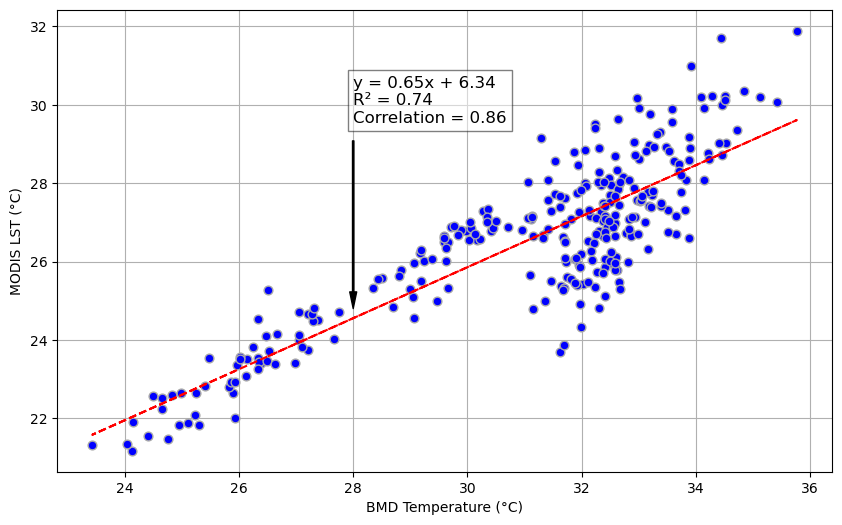

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
%matplotlib inline

# Load the CSV file
file_path = r"C:\Users\tmollick\Documents\Temperature_patterns_Bangladesh\Python_output\Summarize_temp_BMD.csv"
data = pd.read_csv(file_path)

# Extract the BMD and LST temperature data
BMD = data['BMD']
LST = data['LST']

# Calculate the regression line
slope, intercept, r_value, p_value, std_err = linregress(BMD, LST)
line = slope * BMD + intercept

# Create the scatter plot
plt.figure(figsize=(10, 6))

# Turn on the grid behind the plot
plt.grid(True, zorder=0)

# Scatter plot points with dark gray outer boundary
plt.scatter(BMD, LST, c='blue', edgecolor='darkgray', marker='o', s=40, zorder=2)

# Plot the regression line
plt.plot(BMD, line, 'r--', zorder=3)

# Set labels and title
plt.xlabel('BMD Temperature (°C)')
plt.ylabel('MODIS LST (°C)')
#plt.title('Scatter Plot of BMD and LST Temperatures with Regression Line')

# Position for the text box and arrow
text_x = 28
text_y = slope * text_x + intercept + 5  # Higher above the regression line at x = 28

# Display regression equation, R squared, and correlation value using a vertical arrow
equation_text = f'y = {slope:.2f}x + {intercept:.2f}\nR² = {r_value**2:.2f}\nCorrelation = {r_value:.2f}'
plt.annotate(equation_text, xy=(text_x, slope * text_x + intercept), xytext=(text_x, text_y),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5),
             fontsize=12, bbox=dict(facecolor='white', alpha=0.5), zorder=4)

# Save and show the plot with 300 DPI resolution
plt.savefig(r"C:\Users\tmollick\Documents\Temperature_patterns_Bangladesh\Figures\BMD vs LST scatter.png", dpi=300)
plt.show()

### Format Date for LSTM Model

In [ ]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\tmollick\Desktop\Temperature Forecast\Final forecasted Data\Transformed_temp_2018_2027_corrected.csv"
data = pd.read_csv(file_path)

# Create the new Date column with format MM/DD/YYYY
data['DATE'] = pd.to_datetime(data[['Year', 'Month']].assign(Day=1)).dt.strftime('%m/%d/%Y')

# Drop the Year and Month columns
data.drop(columns=['Year', 'Month'], inplace=True)

# Reorder the columns
columns = ['DATE', 'Station', 'Latitude', 'Longitude', 'Elevation'] + [col for col in data.columns if col not in ['Station', 'DATE', 'Latitude', 'Longitude', 'Elevation']]
data = data[columns]

# Display the first few rows to verify
print(data.head())

# Save the modified data to a new CSV file
data.to_csv(r"C:\Users\tmollick\Desktop\Temperature Forecast\Final forecasted Data\2018_2027_converted.csv", index=False)

### Change the format of the forecasted temperatures

In [ ]:
import pandas as pd

# Load the data
file_path = r"C:\Users\tmollick\Desktop\Temperature Forecast\Predicted_temp_2018_2027_all_with_trend.csv"
df = pd.read_csv(file_path)

# Melt the dataframe to convert wide format to long format
df_melted = df.melt(id_vars=['Year', 'Station'], var_name='Month', value_name='Forecasted_Temperature')

# Map the month names to numbers
month_mapping = {'TempJan': 1, 'TempFeb': 2, 'TempMar': 3, 'TempApr': 4, 'TempMay': 5, 'TempJun': 6,
                 'TempJul': 7, 'TempAug': 8, 'TempSep': 9, 'TempOct': 10, 'TempNov': 11, 'TempDec': 12}
df_melted['Month'] = df_melted['Month'].map(month_mapping)

# Reorder the columns
df_final = df_melted[['Year', 'Month', 'Station', 'Forecasted_Temperature']]

# Save the transformed data to a new CSV file
output_path = r"C:\Users\tmollick\Desktop\Temperature Forecast\Final forecasted Data\Transformed_temp_2018_2027_corrected.csv"
df_final.to_csv(output_path, index=False)

print(f"Transformed data saved to: {output_path}")

In [ ]:
import pandas as pd

# Load the CSV file
file_path = r"C:\Users\tmollick\Desktop\Temperature Forecast\Final forecasted Data\combined_1984_2023.csv"
df = pd.read_csv(file_path)

# Function to clean and convert TempMax to float
def clean_tempmax(value):
    try:
        # Correct the issue with double dots
        value = str(value).replace('..', '.')
        # Remove any non-numeric characters and convert to float
        cleaned_value = ''.join(filter(lambda x: x.isdigit() or x == '.', value))
        return float(cleaned_value)
    except ValueError:
        # If there are any other issues, print the value to debug
        print(f"Could not convert value: {value}")
        return 0.0  # Or choose another default value or handling strategy

# Apply the cleaning function to the TempMax column
df['TempMax'] = df['TempMax'].apply(clean_tempmax)

# Convert the column to float type
df['TempMax'] = df['TempMax'].astype(float)

# Verify the conversion
print(df['TempMax'].dtype)
print(df['TempMax'].head())

# Optionally, you can save the modified DataFrame back to CSV if needed
output_path = r"C:\Users\tmollick\Desktop\Temperature Forecast\Final forecasted Data\combined_1984_2027_converted.csv"
df.to_csv(output_path, index=False)

print(f"Converted data saved to: {output_path}")

### LST MODIS CSV file format

In [ ]:
import pandas as pd

# Load the new data which includes the 'Day' column
file_path = r"C:\Users\tmollick\Desktop\A. Weather dataset\LST_BD_2000_2023.csv"
df = pd.read_csv(file_path)

# Create a new column 'Date' by combining 'Year', 'Month', and 'Day'
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# Reorder the columns to have 'Date' and 'LST'
df_final = df[['Date', 'LST']]

# Save the transformed data to a new CSV file
output_path = r"C:\Users\tmollick\Desktop\Temperature Forecast\Final forecasted Data\Transformed_temp_2000_2023.csv"
df_final.to_csv(output_path, index=False)

print(f"Transformed data saved to: {output_path}")


In [ ]:
import pandas as pd

# Load the new data which includes the 'Day' column
file_path = r"C:\Users\tmollick\Desktop\A. Weather dataset\LST_BD_2000_2023.csv"
df = pd.read_csv(file_path)

# Create a new column 'Date' by combining 'Year', 'Month', and 'Day'
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# Reorder the columns to have 'Date' and 'LST'
df_final = df[['Date', 'LST']]

# Calculate the monthly average temperature
df_final['YearMonth'] = df_final['Date'].dt.to_period('M')
monthly_avg = df_final.groupby('YearMonth')['LST'].mean().reset_index()

# Save the transformed data to a new CSV file
output_path = r"C:\Users\tmollick\Desktop\Temperature Forecast\Final forecasted Data\Transformed_temp_2000_2023.csv"
df_final.to_csv(output_path, index=False)

# Save the monthly average temperature to a new CSV file
output_avg_path = r"C:\Users\tmollick\Desktop\Temperature Forecast\Final forecasted Data\Monthly_avg_temp_2000_2023.csv"
monthly_avg.to_csv(output_avg_path, index=False)

print(f"Transformed data saved to: {output_path}")
print(f"Monthly average temperature saved to: {output_avg_path}")

In [ ]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\tmollick\Desktop\Temperature Forecast\Final forecasted Data\Transformed_temp_2018_2027.csv"
data = pd.read_csv(file_path)

# Create the new Date column with format MM/DD/YYYY
data['DATE'] = pd.to_datetime(data[['Year', 'Month']].assign(Day=1)).dt.strftime('%m/%d/%Y')

# Drop the Year and Month columns
data.drop(columns=['Year', 'Month'], inplace=True)

# Reorder the columns
columns = ['DATE', 'Station'] + [col for col in data.columns if col not in ['Station', 'DATE']]
data = data[columns]

# Display the first few rows to verify
print(data.head())

# Save the modified data to a new CSV file
output_path = r"C:\Users\tmollick\Desktop\Temperature Forecast\Final forecasted Data\combined_2018_2027.csv"
data.to_csv(output_path, index=False)

### Heat map using all the predictor variables


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df3 = pd.read_csv(r"C:\Users\tmollick\Desktop\A. Weather dataset\Temperature forecast\Bangladesh weather data 1984-2017.csv")

In [ ]:
# Convert 'Year' and 'Month' columns to object type
df3['Year'] = df3['Year'].astype(object)
df3['Month'] = df3['Month'].astype(object)
df3['Station'] = df3['Station'].astype(object)

In [ ]:
# Select only the numeric columns for correlation matrix
numeric_cols = df3.select_dtypes(include='number')

# Compute the correlation matrix
corr = numeric_cols.corr()

# Plot the heatmap with increased annotation and axis label font size
plt.figure(figsize=(15, 8))
heatmap = sns.heatmap(corr, annot=True, annot_kws={"size": 12}, cmap='inferno')

# Increase the font size for the x and y axis labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=12)

# Increase the font size for the color bar
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)

# Save the figure as a PNG file with 300 DPI
output_path = 'Heat map of prediction variables.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.show()

### Validation of Actual Vs Predicted using the year 2022

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
from sklearn.metrics import mean_squared_error

# Load the CSV file
file_path = r"C:\Users\tmollick\Desktop\Temperature Forecast\Final forecasted Data\Validation of Actual vs Predicted temperatures.csv"
data = pd.read_csv(file_path)

# Extract the BMD and LST temperature data
Actual = data['Actual']
Predicted = data['Predicted']

In [ ]:
# Calculate the regression line
slope, intercept, r_value, p_value, std_err = linregress(Actual, Predicted)
line = slope * Actual + intercept

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(Actual, Predicted))

# Create the scatter plot
plt.figure(figsize=(10, 6))

# Turn on the grid behind the plot
plt.grid(True, zorder=0)

# Scatter plot points with dark gray outer boundary
plt.scatter(Actual, Predicted, c='blue', edgecolor='darkgray', marker='o', linewidths=0.5, s=20, zorder=2)

# Plot the regression line
plt.plot(Actual, line, 'r--', zorder=3)

# Set labels and title
plt.xlabel('Actual Temperature (°C)')
plt.ylabel('Forecasted Temperature (°C)')
# plt.title('Scatter Plot of Actual and Predicted Temperatures with Regression Line')

# Display regression equation, R², Correlation, and RMSE in the top-left corner
equation_text = (f'y = {slope:.2f}x + {intercept:.2f}\n'
                 f'R² = {r_value**2:.2f}\n'
                 f'Correlation = {r_value:.2f}\n'
                 f'RMSE = {rmse:.2f}')

plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5), zorder=4)



# Save and show the plot with 300 DPI resolution
plt.savefig(r"C:\Users\tmollick\Desktop\Temperature Forecast\Final forecasted Data\Validation of actual vs predicted temperature.png", dpi=300)
plt.show()

### Time series Analysis

#### BMD Dataset

In [ ]:
# Load the best model
best_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/BMD_weather_data/BGD_interpolation_papaer_forecast.keras')


In [ ]:
# Decompose the time series to extract trend using only TempMax
temp_max_series = df['TempMax']
decomposition = seasonal_decompose(temp_max_series, model='multiplicative', period=365)
trend = decomposition.trend.dropna()

In [ ]:
# Plot the trend component
plt.figure(figsize=(10, 6))
plt.plot(trend, label='Trend')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()